# MobileNet Model

### <u>Action Classes - 15</u>

In [1]:
from keras import models
from keras.layers import Dense,Flatten
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt

from keras.applications import mobilenet

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


2022-08-25 16:59:41.358562: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-25 16:59:41.395704: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-25 16:59:41.395905: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


## Dataset

In [3]:
from keras.preprocessing.image import ImageDataGenerator

dataset_path = "./frames/"
# will contain the categories in respective folders

# Data generators
train_datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2)


In [4]:
image_size = (224,224)
batch_size = 10

train_batches = train_datagen.flow_from_directory(
    dataset_path,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = "categorical",
    subset = "training"
)

validation_batches = train_datagen.flow_from_directory(
    dataset_path,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = "categorical",
    subset = "validation"
)

test_batches = train_datagen.flow_from_directory(
    dataset_path,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = "categorical",
    subset = "validation"
)

Found 3767 images belonging to 15 classes.
Found 934 images belonging to 15 classes.
Found 934 images belonging to 15 classes.


In [5]:
train_batches.class_indices

{'ApplyLipstick': 0,
 'Archery': 1,
 'BabyCrawling': 2,
 'Biking': 3,
 'Diving': 4,
 'Fencing': 5,
 'Kayaking': 6,
 'MilitaryParade': 7,
 'PizzaTossing': 8,
 'ShavingBeard': 9,
 'SkateBoarding': 10,
 'SumoWrestling': 11,
 'TennisSwing': 12,
 'Typing': 13,
 'WritingOnBoard': 14}

In [6]:
from matplotlib import pyplot as plt

def plot_images(images_arr):
    fig, axes = plt.subplots(1,10)
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

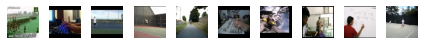

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [7]:
imgs, labels = train_batches[0]
plot_images(imgs)
print(labels[:10])

## Initialize model

In [8]:
mobilenet_model_top = mobilenet.MobileNet(include_top=True,
                   input_shape=(224,224,3),
                   pooling='avg',
                   weights='imagenet')

for (i,layer) in enumerate(mobilenet_model_top.layers):
    print((i, layer.name, layer.output_shape))

2022-08-25 16:59:42.185623: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-25 16:59:42.187185: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-25 16:59:42.188069: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-25 16:59:42.188475: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

(0, 'input_1', [(None, 224, 224, 3)])
(1, 'conv1', (None, 112, 112, 32))
(2, 'conv1_bn', (None, 112, 112, 32))
(3, 'conv1_relu', (None, 112, 112, 32))
(4, 'conv_dw_1', (None, 112, 112, 32))
(5, 'conv_dw_1_bn', (None, 112, 112, 32))
(6, 'conv_dw_1_relu', (None, 112, 112, 32))
(7, 'conv_pw_1', (None, 112, 112, 64))
(8, 'conv_pw_1_bn', (None, 112, 112, 64))
(9, 'conv_pw_1_relu', (None, 112, 112, 64))
(10, 'conv_pad_2', (None, 113, 113, 64))
(11, 'conv_dw_2', (None, 56, 56, 64))
(12, 'conv_dw_2_bn', (None, 56, 56, 64))
(13, 'conv_dw_2_relu', (None, 56, 56, 64))
(14, 'conv_pw_2', (None, 56, 56, 128))
(15, 'conv_pw_2_bn', (None, 56, 56, 128))
(16, 'conv_pw_2_relu', (None, 56, 56, 128))
(17, 'conv_dw_3', (None, 56, 56, 128))
(18, 'conv_dw_3_bn', (None, 56, 56, 128))
(19, 'conv_dw_3_relu', (None, 56, 56, 128))
(20, 'conv_pw_3', (None, 56, 56, 128))
(21, 'conv_pw_3_bn', (None, 56, 56, 128))
(22, 'conv_pw_3_relu', (None, 56, 56, 128))
(23, 'conv_pad_4', (None, 57, 57, 128))
(24, 'conv_dw_4', (No

In [9]:
mobilenet_model = mobilenet.MobileNet(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=15,
                   weights='imagenet')

for (i,layer) in enumerate(mobilenet_model.layers):
    layer.trainable = False
    print((i, layer.name, layer.output_shape))

(0, 'input_2', [(None, 224, 224, 3)])
(1, 'conv1', (None, 112, 112, 32))
(2, 'conv1_bn', (None, 112, 112, 32))
(3, 'conv1_relu', (None, 112, 112, 32))
(4, 'conv_dw_1', (None, 112, 112, 32))
(5, 'conv_dw_1_bn', (None, 112, 112, 32))
(6, 'conv_dw_1_relu', (None, 112, 112, 32))
(7, 'conv_pw_1', (None, 112, 112, 64))
(8, 'conv_pw_1_bn', (None, 112, 112, 64))
(9, 'conv_pw_1_relu', (None, 112, 112, 64))
(10, 'conv_pad_2', (None, 113, 113, 64))
(11, 'conv_dw_2', (None, 56, 56, 64))
(12, 'conv_dw_2_bn', (None, 56, 56, 64))
(13, 'conv_dw_2_relu', (None, 56, 56, 64))
(14, 'conv_pw_2', (None, 56, 56, 128))
(15, 'conv_pw_2_bn', (None, 56, 56, 128))
(16, 'conv_pw_2_relu', (None, 56, 56, 128))
(17, 'conv_dw_3', (None, 56, 56, 128))
(18, 'conv_dw_3_bn', (None, 56, 56, 128))
(19, 'conv_dw_3_relu', (None, 56, 56, 128))
(20, 'conv_pw_3', (None, 56, 56, 128))
(21, 'conv_pw_3_bn', (None, 56, 56, 128))
(22, 'conv_pw_3_relu', (None, 56, 56, 128))
(23, 'conv_pad_4', (None, 57, 57, 128))
(24, 'conv_dw_4', (No

In [10]:
model = models.Sequential()

dense_layer_1 = Dense(32, activation='relu')
dense_layer_2 = Dense(32, activation='relu')
dense_layer_2 = Dense(32, activation='relu')
prediction_layer = Dense(15, activation='softmax')

model.add(mobilenet_model)
model.add(dense_layer_1)
model.add(dense_layer_2)
model.add(prediction_layer)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 1024)             3228864   
 nal)                                                            
                                                                 
 dense (Dense)               (None, 32)                32800     
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 15)                495       
                                                                 
Total params: 3,263,215
Trainable params: 34,351
Non-trainable params: 3,228,864
_________________________________________________________________


In [11]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [12]:
model.save("./models/action-class-15-model-mobilenet.h5")

In [13]:
fit = model.fit(train_batches, epochs=20, validation_data=validation_batches)

Epoch 1/20


2022-08-25 16:59:46.105555: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8401
2022-08-25 16:59:46.535466: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


377/377 [==============================] - 17s 38ms/step - loss: 0.6293 - accuracy: 0.8251 - val_loss: 0.3678 - val_accuracy: 0.8790
Epoch 2/20
377/377 [==============================] - 14s 36ms/step - loss: 0.0930 - accuracy: 0.9758 - val_loss: 0.2705 - val_accuracy: 0.9111
Epoch 3/20
377/377 [==============================] - 14s 36ms/step - loss: 0.0324 - accuracy: 0.9939 - val_loss: 0.3515 - val_accuracy: 0.9101
Epoch 4/20
377/377 [==============================] - 14s 36ms/step - loss: 0.0127 - accuracy: 0.9987 - val_loss: 0.2843 - val_accuracy: 0.9143
Epoch 5/20
377/377 [==============================] - 14s 36ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.2939 - val_accuracy: 0.9186
Epoch 6/20
377/377 [==============================] - 14s 36ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.2835 - val_accuracy: 0.9165
Epoch 7/20
377/377 [==============================] - 14s 36ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.2682 - val_accuracy: 0.9218
Epo

In [14]:
model.save("./models/action-class-15-trained-mobilenet.h5")

## Evaluate and Predict

In [15]:
model = models.load_model("./models/action-class-15-trained-mobilenet.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 1024)             3228864   
 nal)                                                            
                                                                 
 dense (Dense)               (None, 32)                32800     
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 15)                495       
                                                                 
Total params: 3,263,215
Trainable params: 34,351
Non-trainable params: 3,228,864
_________________________________________________________________


In [16]:
model.evaluate(test_batches)

94/94 [==============================] - 5s 39ms/step - loss: 0.3254 - accuracy: 0.9208


[0.3254256248474121, 0.9207708835601807]

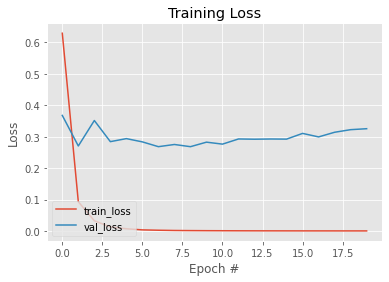

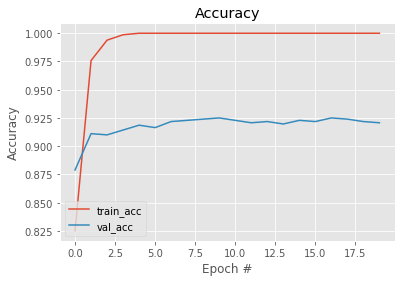

In [17]:
plt.style.use("ggplot")
plt.figure()

plt.plot(np.arange(0, 20), fit.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), fit.history["val_loss"], label="val_loss")
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")
plt.show()

plt.plot(np.arange(0, 20), fit.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), fit.history["val_accuracy"], label="val_acc")
plt.title("Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")
plt.show()

In [18]:
print("Avg Val Acc: " + str(sum(fit.history["val_accuracy"])/20))
print("Avg Val Loss: " + str(sum(fit.history["val_loss"])/20))


Avg Val Acc: 0.9182548135519027
Avg Val Loss: 0.29817948341369627
